In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier


import xgboost as xgb

In [3]:
df = pd.read_csv("SD03Q016\Diabetes Database.csv")

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.shape

(768, 9)

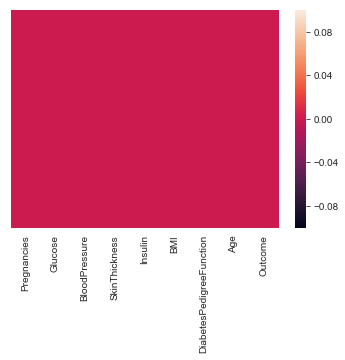

In [9]:
sns.heatmap(df.isnull(),yticklabels=False)

In [10]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [12]:
df['Outcome']=df['Outcome'].astype('bool')

In [13]:
df.dtypes['Outcome']

dtype('bool')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [15]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [16]:
preg_proportion = np.array(df['Pregnancies'].value_counts())
preg_month = np.array(df['Pregnancies'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)


In [17]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg.head(10)

,count_of_preg_prop,percentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


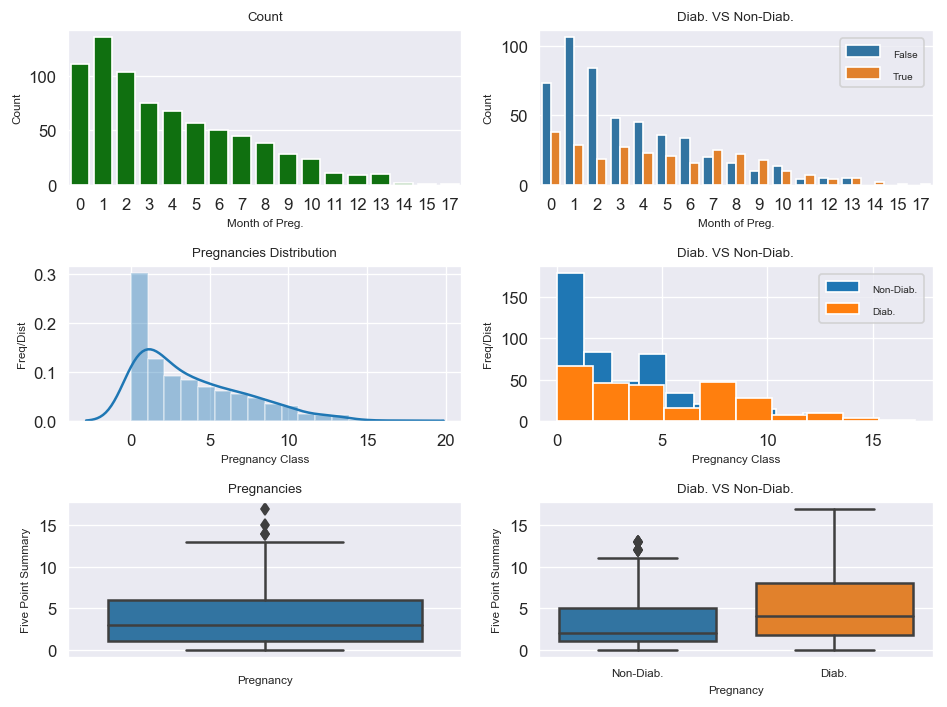

In [18]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.countplot('Pregnancies',data=df,ax=axes[0][0],color='green')
axes[0][0].set_title('Count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.countplot('Pregnancies',data=df,hue='Outcome',ax=axes[0][1])
axes[0][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10 = sns.distplot(df['Pregnancies'],ax=axes[1][0])
axes[1][0].set_title('Pregnancies Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot11 = df[df['Outcome']==False]['Pregnancies'].plot.hist(ax=axes[1][1],label='Non-Diab.')
plot11_2=df[df['Outcome']==True]['Pregnancies'].plot.hist(ax=axes[1][1],label='Diab.')
axes[1][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6') # for legend text
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6') # for legend title
plt.tight_layout()

plot20 = sns.boxplot(df['Pregnancies'],ax=axes[2][0],orient='v')
axes[2][0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=axes[2][1])
axes[2][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
plt.tight_layout()
plt.show()


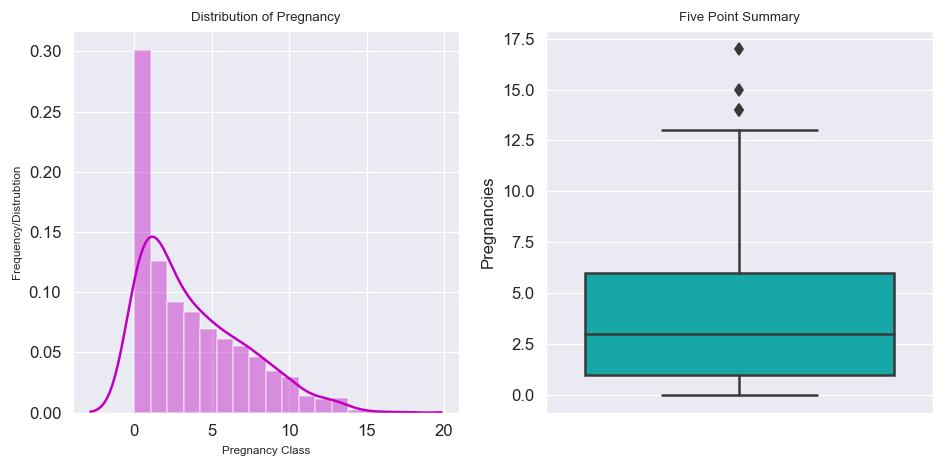

In [19]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='m')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

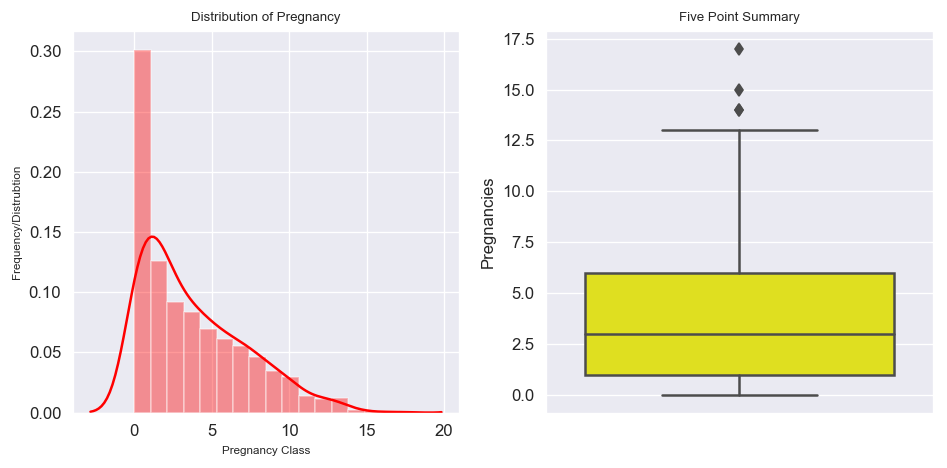

In [20]:


fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='red')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='yellow')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()


In [21]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

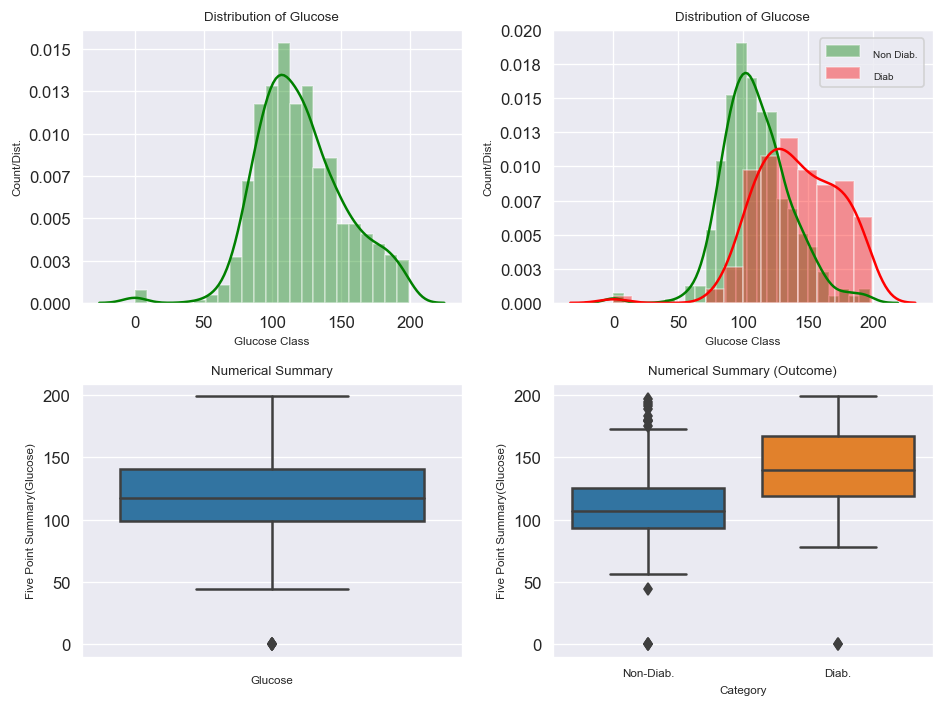

In [22]:
#sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))


plot00=sns.distplot(df['Glucose'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['Glucose'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['Glucose'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(df['Glucose'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='Glucose',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

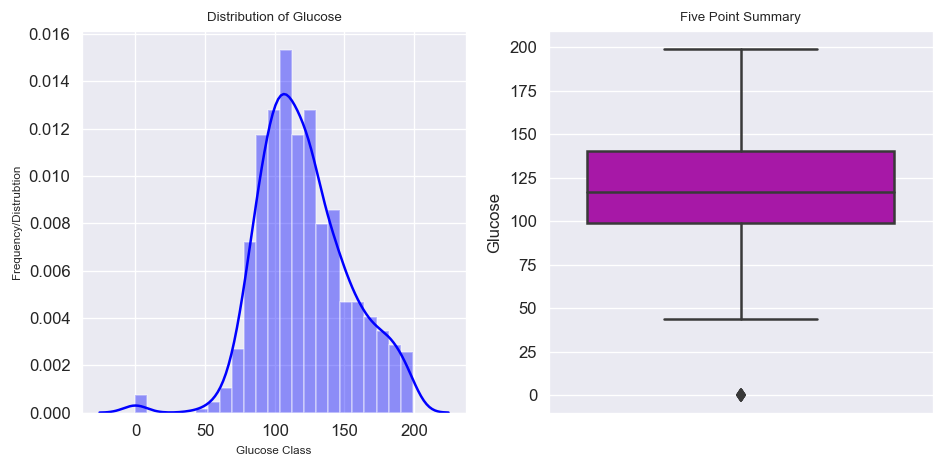

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [24]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())#There is no outlier and also distribution is normal ,
#So i will treat 0 with mean value.


df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,True
1,1,85.0,66,29,0,26.6,0.351,31,False
2,8,183.0,64,0,0,23.3,0.672,32,True
3,1,89.0,66,23,94,28.1,0.167,21,False
4,0,137.0,40,35,168,43.1,2.288,33,True


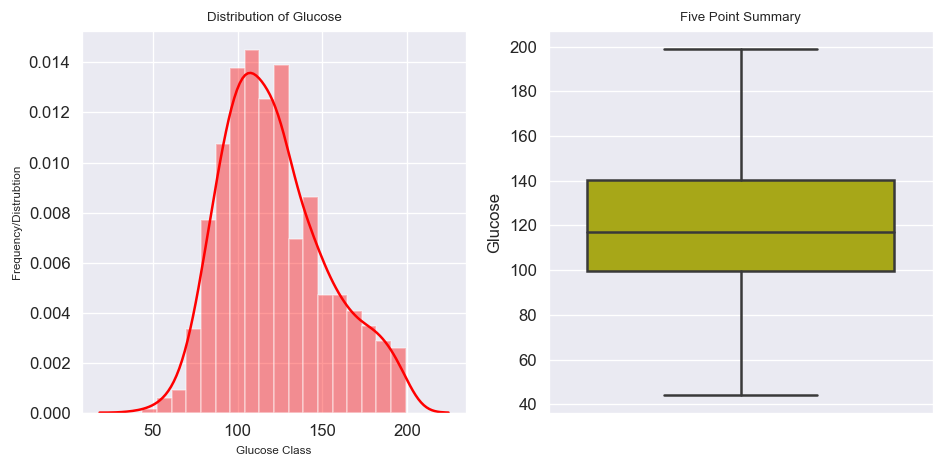

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='y')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()


In [26]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

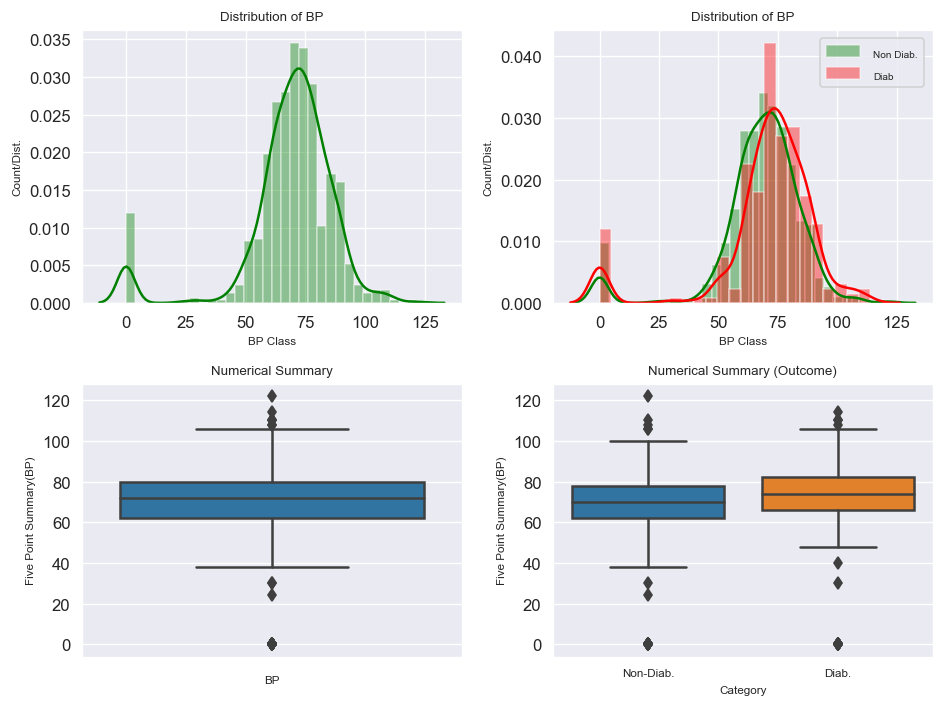

In [27]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0][0].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['BloodPressure'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['BloodPressure'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0][1].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(df['BloodPressure'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('BP',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='BloodPressure',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [28]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,True
1,1,85.0,66,29,0,26.6,0.351,31,False
2,8,183.0,64,0,0,23.3,0.672,32,True
3,1,89.0,66,23,94,28.1,0.167,21,False
4,0,137.0,40,35,168,43.1,2.288,33,True


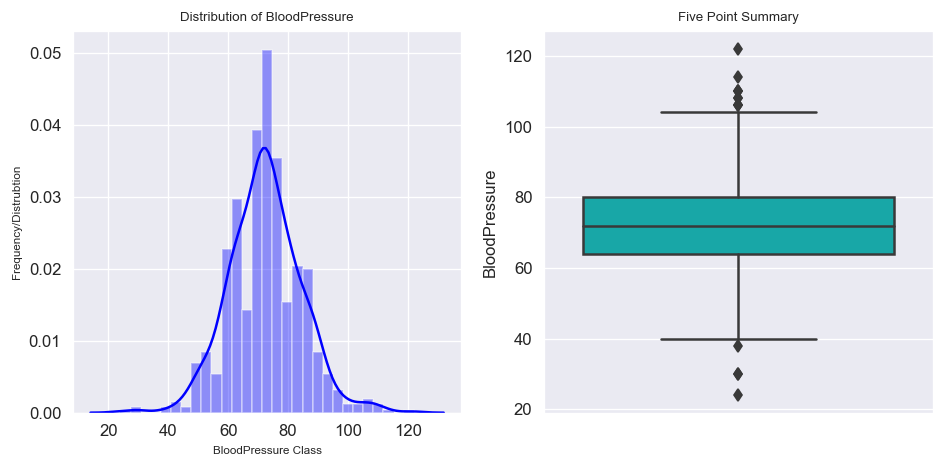

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [30]:
df.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

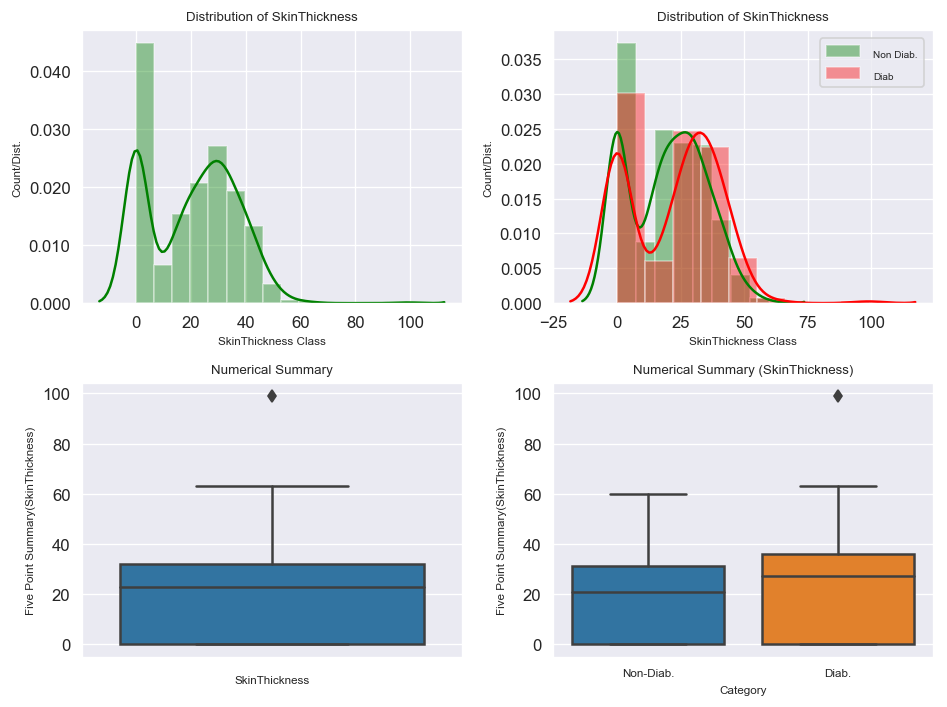

In [31]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0][0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['SkinThickness'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['SkinThickness'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0][1].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(df['SkinThickness'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='SkinThickness',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (SkinThickness)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [32]:
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,0,33.6,0.627,50,True
1,1,85.0,66,29.000000,0,26.6,0.351,31,False
2,8,183.0,64,20.536458,0,23.3,0.672,32,True
3,1,89.0,66,23.000000,94,28.1,0.167,21,False
4,0,137.0,40,35.000000,168,43.1,2.288,33,True


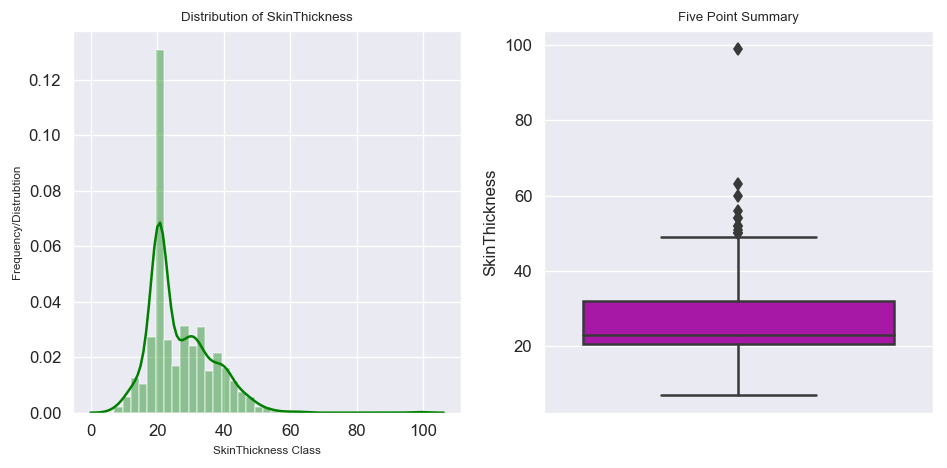

In [33]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='green')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [34]:
df.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

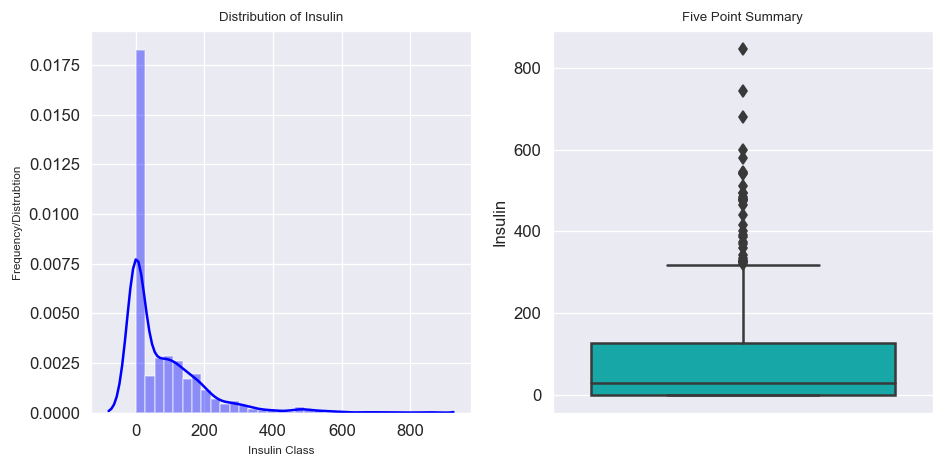

In [35]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()


In [36]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,30.5,33.6,0.627,50,True
1,1,85.0,66,29.000000,30.5,26.6,0.351,31,False
2,8,183.0,64,20.536458,30.5,23.3,0.672,32,True
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,False
4,0,137.0,40,35.000000,168.0,43.1,2.288,33,True


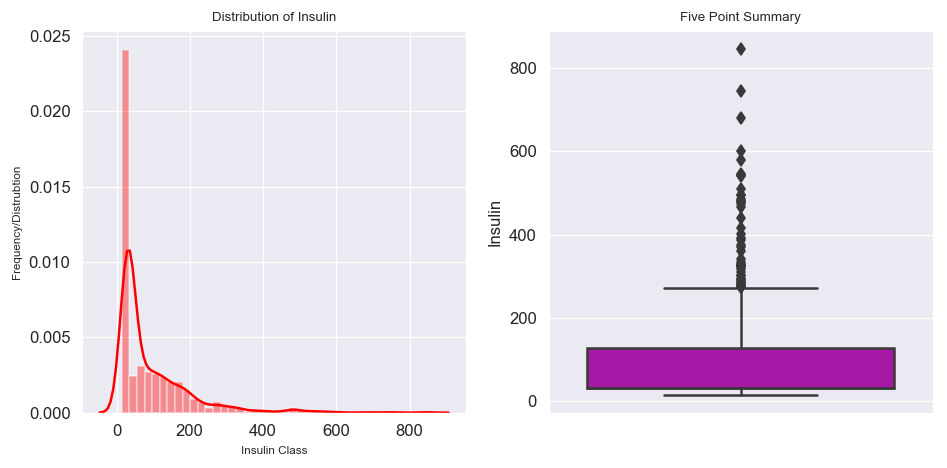

In [37]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [38]:
df.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

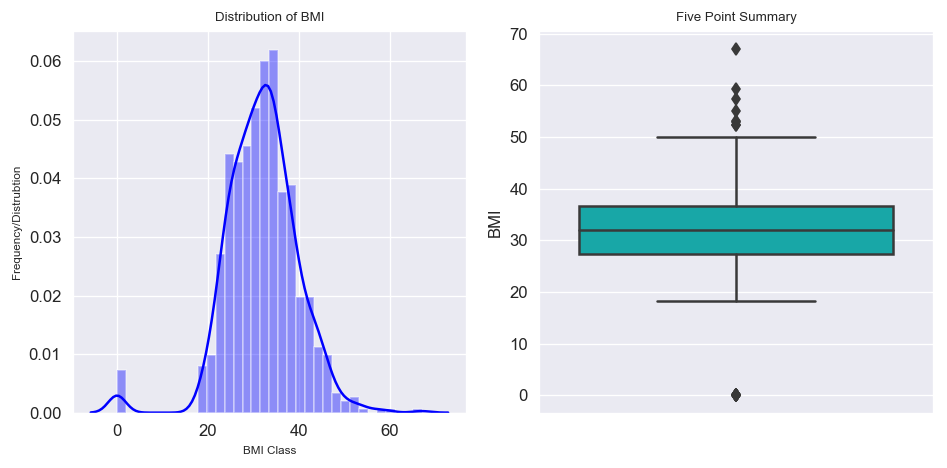

In [39]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [40]:
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,30.5,33.6,0.627,50,True
1,1,85.0,66,29.000000,30.5,26.6,0.351,31,False
2,8,183.0,64,20.536458,30.5,23.3,0.672,32,True
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,False
4,0,137.0,40,35.000000,168.0,43.1,2.288,33,True


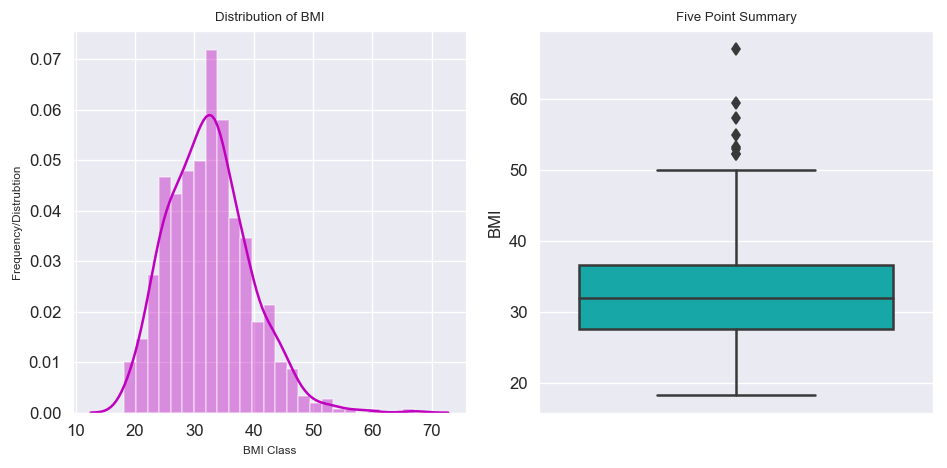

In [41]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [42]:
df.DPF.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DPF, dtype: float64

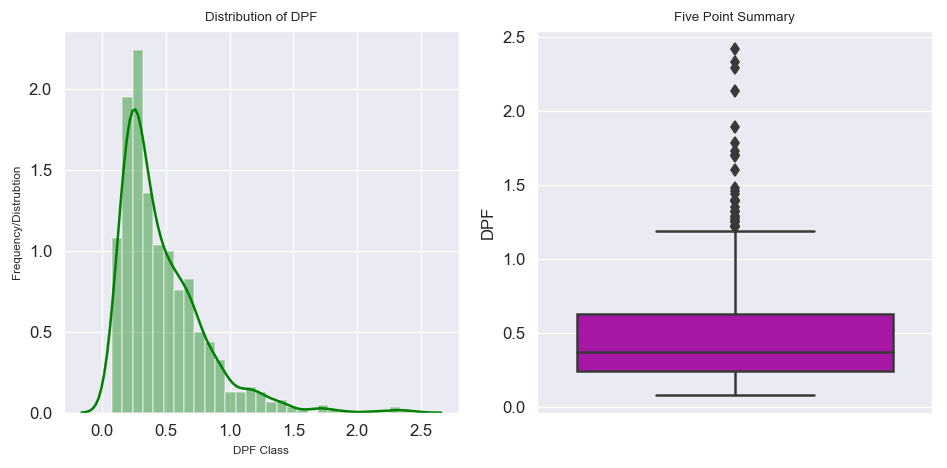

In [43]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DPF'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [44]:
df.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

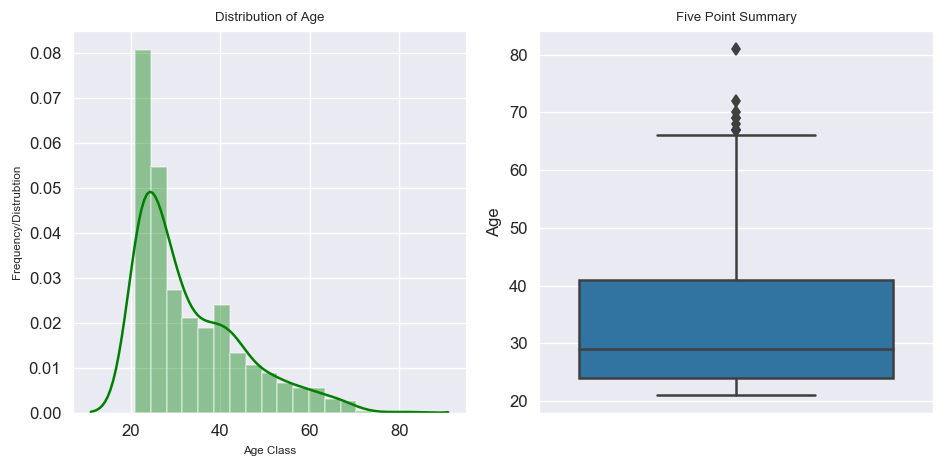

In [45]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

## Now we are done with missing value and Outliers. Let us take a look at data and then move ahead with other steps.

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,30.5,33.6,0.627,50,True
1,1,85.0,66,29.000000,30.5,26.6,0.351,31,False
2,8,183.0,64,20.536458,30.5,23.3,0.672,32,True
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,False
4,0,137.0,40,35.000000,168.0,43.1,2.288,33,True


In [47]:
df.shape

(768, 9)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    bool   
dtypes: bool(1), float64(5), int64(3)
memory usage: 48.9 KB


<Figure size 720x480 with 0 Axes>

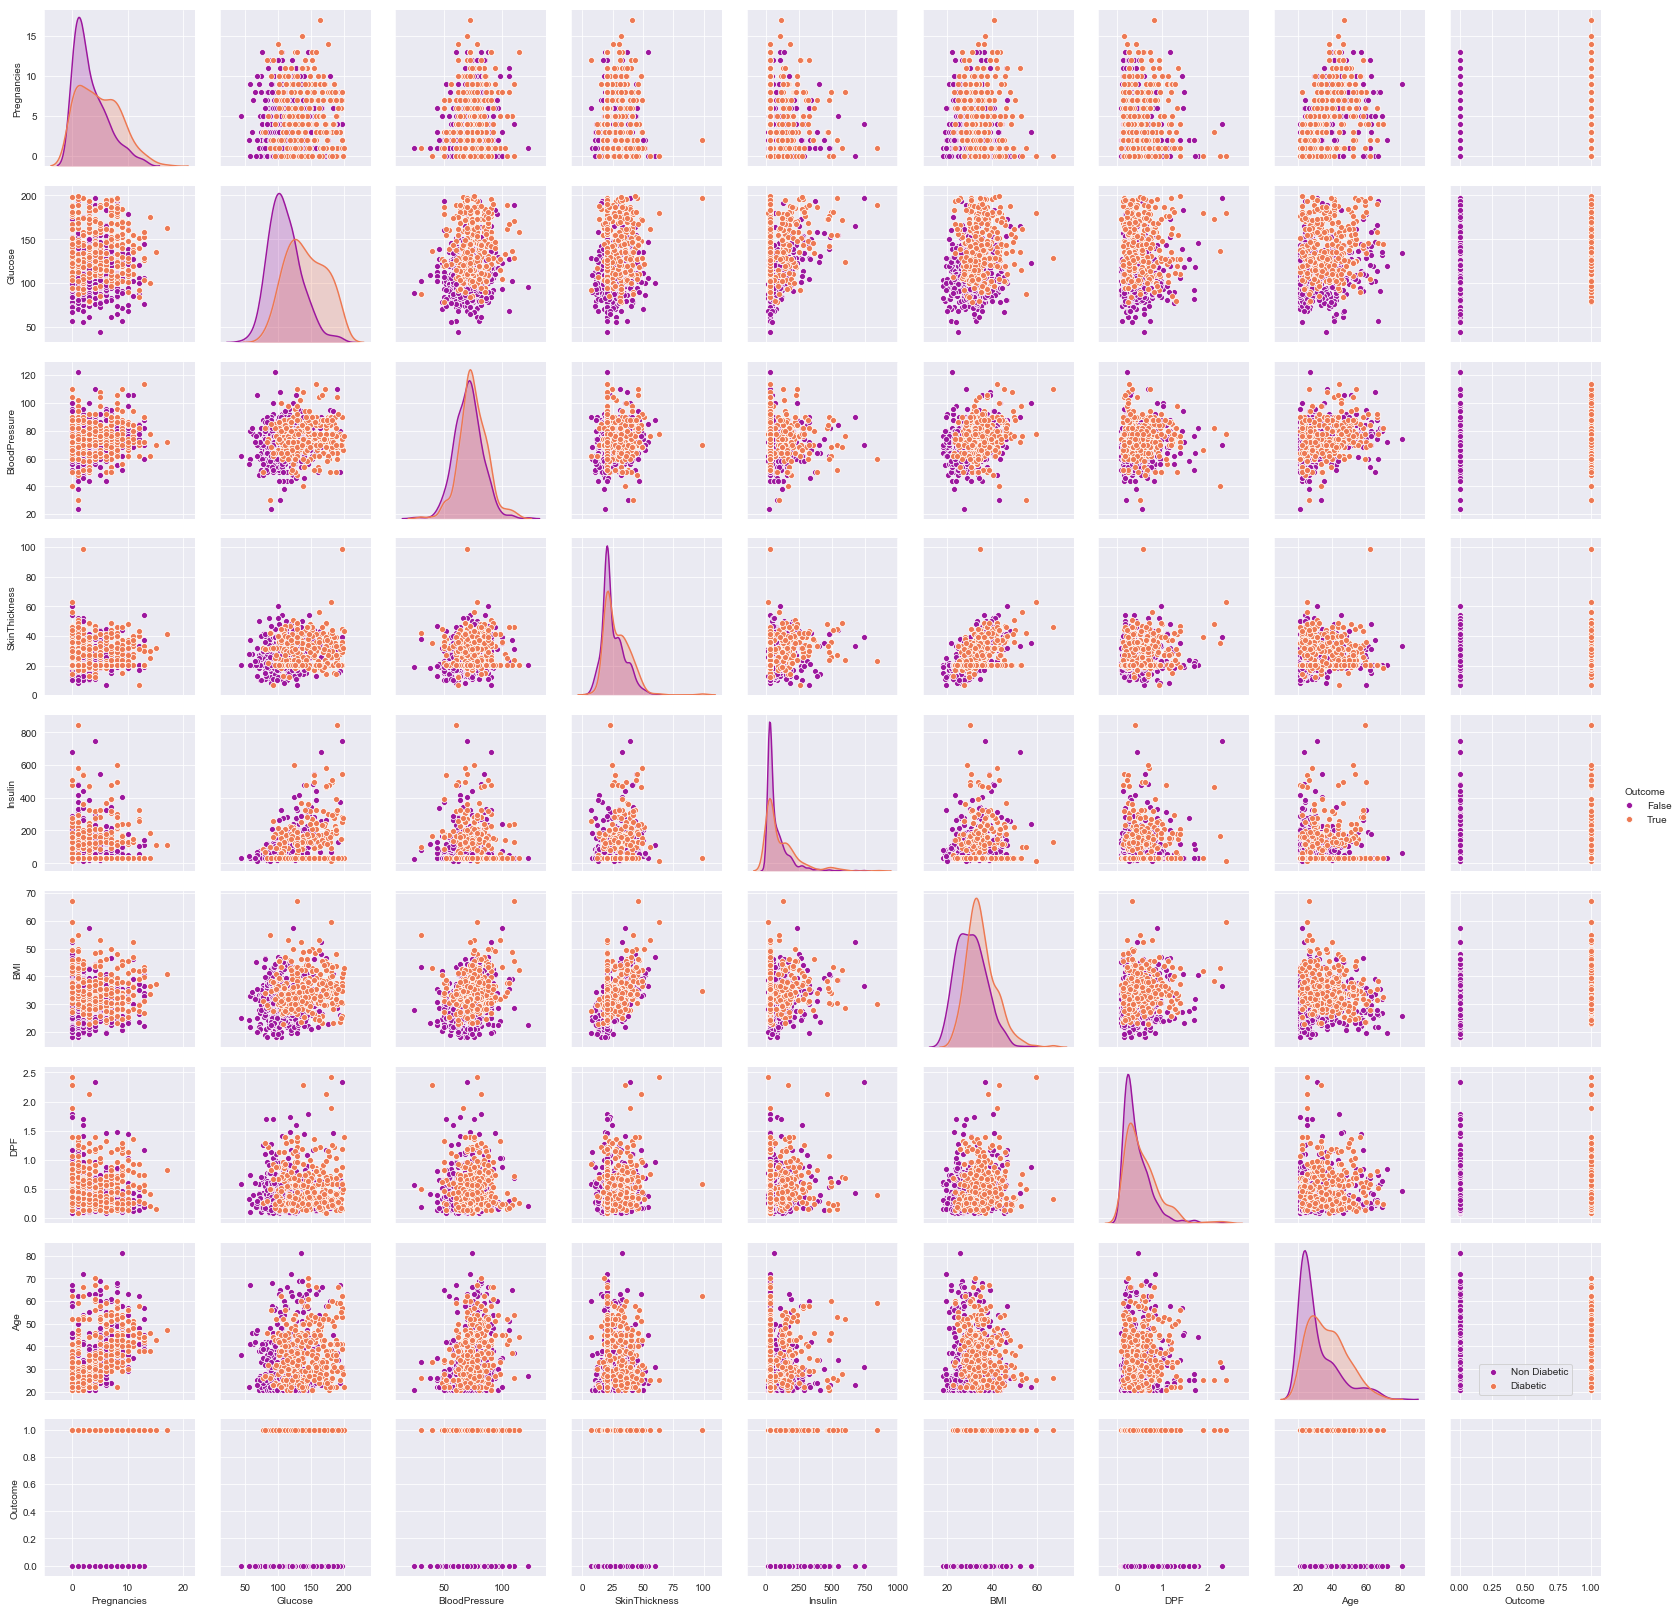

In [49]:

plt.figure(dpi = 120)
sns.pairplot(df,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()



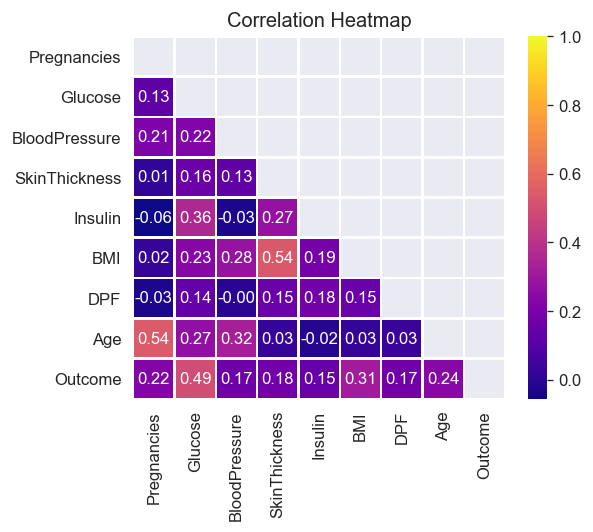

In [50]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Joint plot of Glucose with Other Variables ==> 

Correlation between Glucose and Pregnancies ==>  0.12796381756932743


<Figure size 500x400 with 0 Axes>

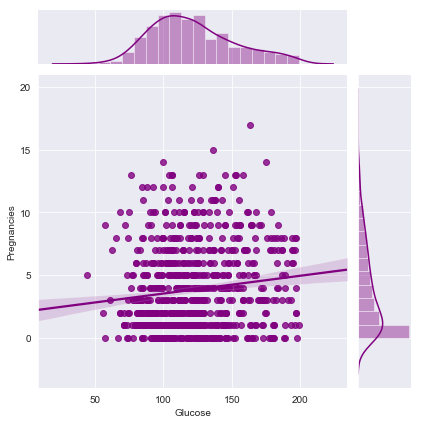

Correlation between Glucose and BloodPressure ==>  0.2186234393444391


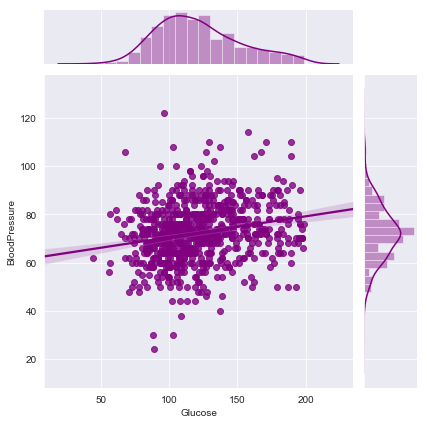

Correlation between Glucose and SkinThickness ==>  0.16076577861043662


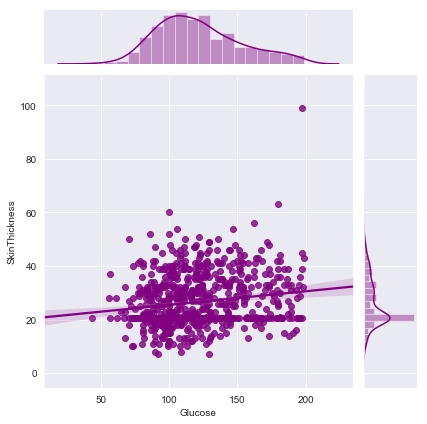

Correlation between Glucose and Insulin ==>  0.357080722696078


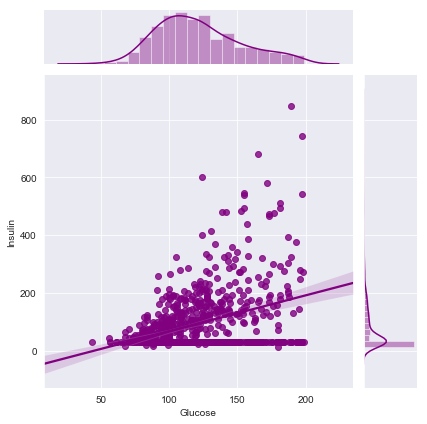

Correlation between Glucose and BMI ==>  0.2314775020863127


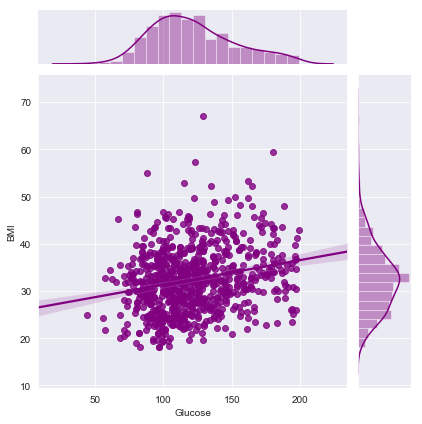

Correlation between Glucose and DPF ==>  0.1371063599357901


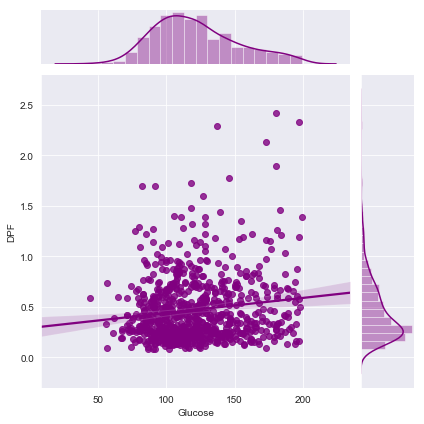

Correlation between Glucose and Age ==>  0.26659989338204987


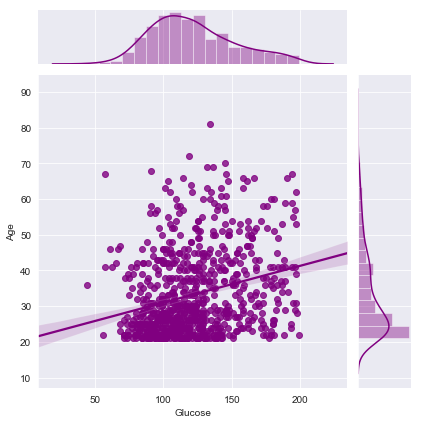

In [51]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  df.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlation between Glucose and {i} ==> ",df.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=df,kind = 'regression',color = 'purple')
        plt.show()

Joint plot of BloodPressure with Other Variables ==> 

Correlation between BloodPressure and SkinThickness ==>  0.12787372649556178


<Figure size 500x400 with 0 Axes>

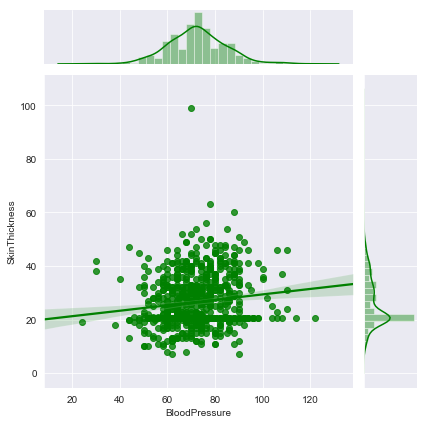

Correlation between BloodPressure and Insulin ==>  -0.028721243169353858


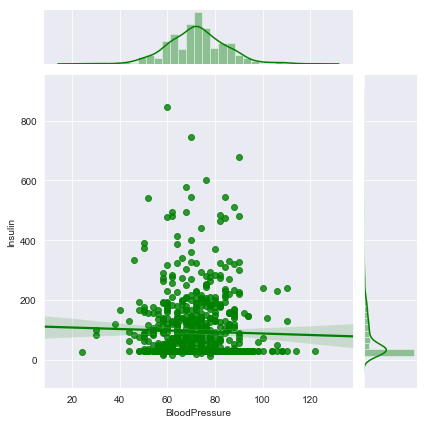

Correlation between BloodPressure and BMI ==>  0.28112926104077907


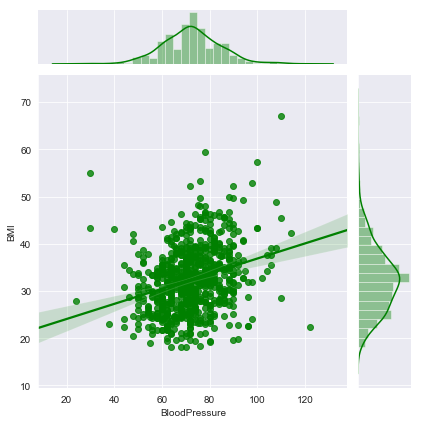

Correlation between BloodPressure and DPF ==>  -0.0023783361074089927


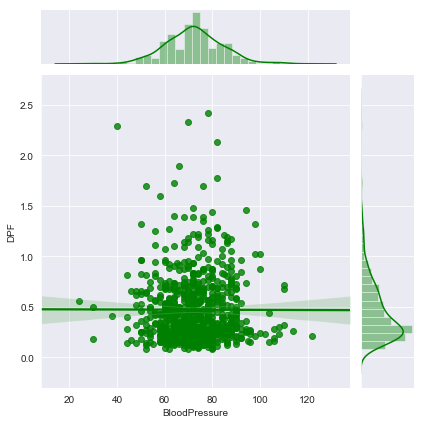

Correlation between BloodPressure and Age ==>  0.32491539143687675


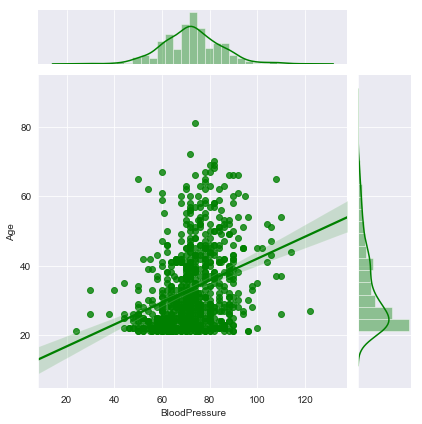

In [52]:
col = list(df.columns)
idx = col.index('BloodPressure')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of BloodPressure with Other Variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlation between BloodPressure and {col[i]} ==> ",df.corr().loc['BloodPressure'][col[i]])
    sns.jointplot(x='BloodPressure',y=col[i],data=df,kind = 'regression',color = 'green')
    plt.show()

Joint plot of SkinThickness with Other Variables ==> 

Correlation between SkinThickness and Insulin ==>  0.27425311239135775


<Figure size 500x400 with 0 Axes>

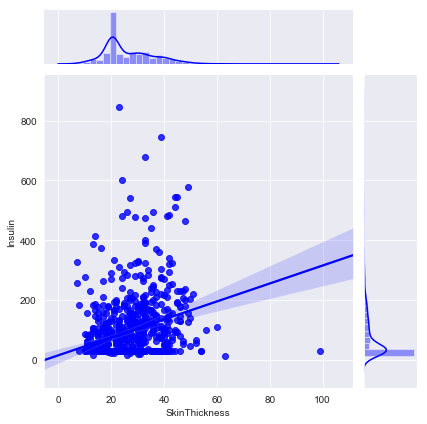

Correlation between SkinThickness and BMI ==>  0.535703465788752


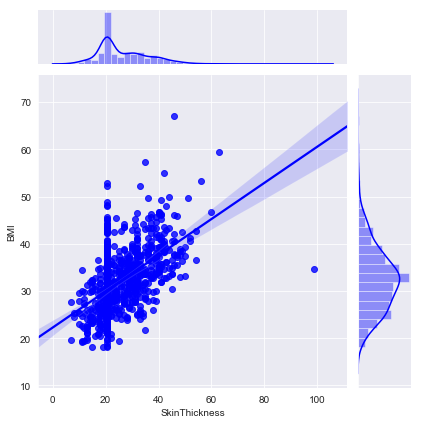

Correlation between SkinThickness and DPF ==>  0.1549612444252026


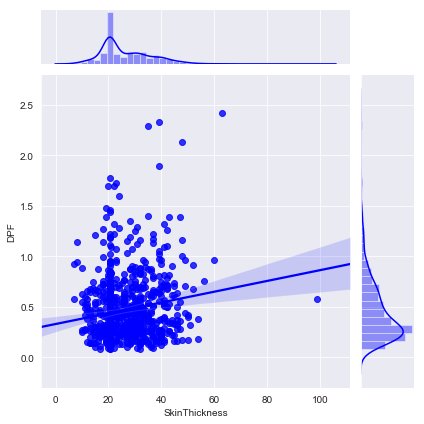

Correlation between SkinThickness and Age ==>  0.026422914991081136


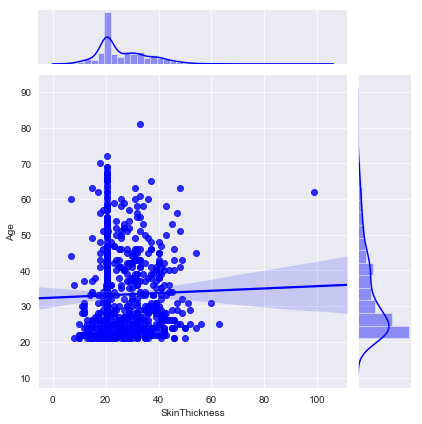

In [53]:
col = list(df.columns)
idx = col.index('SkinThickness')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of SkinThickness with Other Variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlation between SkinThickness and {col[i]} ==> ",df.corr().loc['SkinThickness'][col[i]])
    sns.jointplot(x='SkinThickness',y=col[i],data=df,kind = 'regression',color = 'blue')
    plt.show()

Joint plot of Insulin with Other Variables ==> 

Correlation between Insulin and BMI ==>  0.18903084508399412


<Figure size 500x400 with 0 Axes>

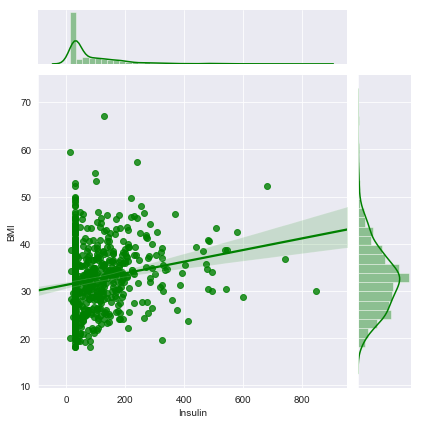

Correlation between Insulin and DPF ==>  0.17802935050215637


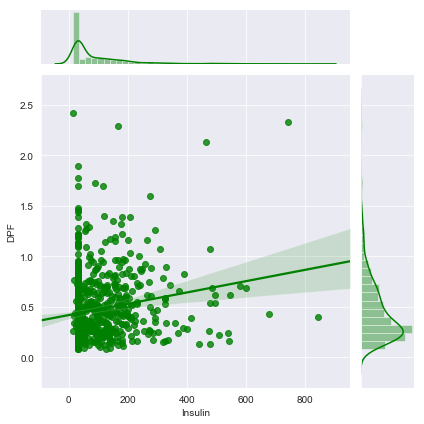

Correlation between Insulin and Age ==>  -0.015412729547878189


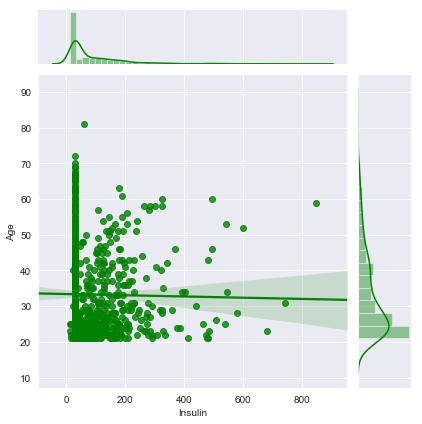

In [54]:
col = list(df.columns)
idx = col.index('Insulin')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Insulin with Other Variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlation between Insulin and {col[i]} ==> ",df.corr().loc['Insulin'][col[i]])
    sns.jointplot(x='Insulin',y=col[i],data=df,kind = 'regression',color = 'green')
    plt.show()

Joint plot of BMI with Other Variables ==> 

Correlation between BMI and DPF ==>  0.1535079975937687


<Figure size 500x400 with 0 Axes>

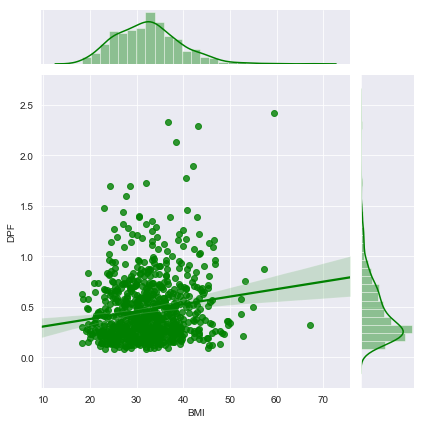

Correlation between BMI and Age ==>  0.02574811265388943


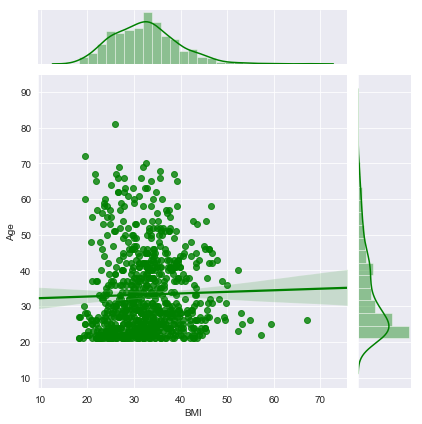

In [55]:
col = list(df.columns)
idx = col.index('BMI')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of BMI with Other Variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlation between BMI and {col[i]} ==> ",df.corr().loc['BMI'][col[i]])
    sns.jointplot(x='BMI',y=col[i],data=df,kind = 'regression',color = 'green')
    plt.show()

Joint plot of DPF with Other Variables ==> 

Correlation between DPF and Age ==>  0.03356131243480539


<Figure size 500x400 with 0 Axes>

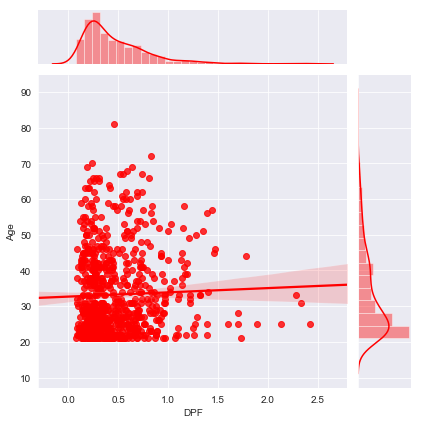

In [56]:
col = list(df.columns)
idx = col.index('DPF')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of DPF with Other Variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlation between DPF and {col[i]} ==> ",df.corr().loc['DPF'][col[i]])
    sns.jointplot(x='DPF',y=col[i],data=df,kind = 'regression',color = 'red')
    plt.show()

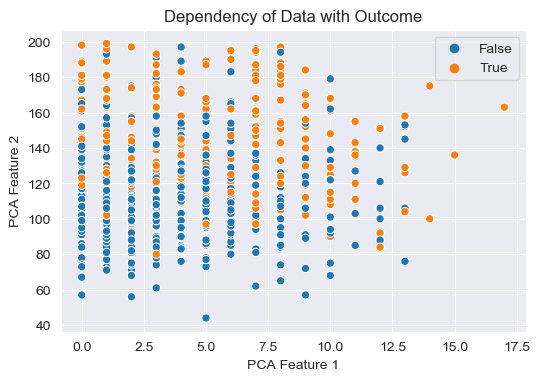

In [57]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

x_new = pca.transform(x)

xs = x[:,0]
ys = x[:,1]

plt.figure(dpi=100)
sns.scatterplot(x=xs,y=ys,hue=y).set_title('Dependency of Data with Outcome')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

In [58]:
df.var()

Pregnancies         11.354056
Glucose            926.351048
BloodPressure      146.328741
SkinThickness       92.760798
Insulin          11140.295536
BMI                 47.270761
DPF                  0.109779
Age                138.303046
Outcome              0.227483
dtype: float64

## Variance is varying to a greater extent, So i will standardize. I am removing dpf because variance is very low.

In [59]:
df.drop('DPF',axis = 1,inplace=True)

## Split Data

In [60]:
df.Outcome.value_counts()

False    500
True     268
Name: Outcome, dtype: int64

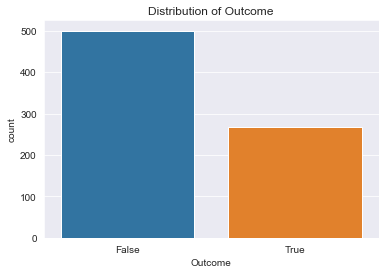

In [61]:
sns.countplot(df['Outcome']).set_title('Distribution of Outcome')
plt.show()

In [62]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 7)
(154, 7)
(614,)
(154,)


In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

# Logistic Regression

In [64]:
## Logistic Regression

Model = LogisticRegression()
Model.fit(x_train, y_train)
y_pred = Model.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.82      0.90      0.86       107
        True       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

[[96 11]
 [21 26]]
accuracy is 0.7922077922077922


# KNN

In [65]:
# K-Nearest Neighbours

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(x_train, y_train)

y_pred = Model.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))



knn = KNeighborsClassifier()

param_grid = {'n_neighbors':[5,10,15,25,30,50]}

grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)
grid_knn.fit(x_train_std,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ",grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(x_test_std,y_test))

              precision    recall  f1-score   support

       False       0.81      0.86      0.83       107
        True       0.62      0.53      0.57        47

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.75      0.76      0.75       154

[[92 15]
 [22 25]]
accuracy is 0.7597402597402597
Best Score ==>  0.7506874669487045
Tuned Paramerers ==>  {'n_neighbors': 10}
Accuracy on Train set ==>  0.7785016286644951
Accuracy on Test set ==>  0.7857142857142857


# Decision Tree

In [78]:
## Decision Tree

Model = DecisionTreeClassifier()
Model.fit(x_train, y_train)
y_pred = Model.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))


dtc = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.2,0.4,0.6,0.8,0.9,1]}

grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)

              precision    recall  f1-score   support

       False       0.79      0.72      0.75       107
        True       0.47      0.57      0.52        47

    accuracy                           0.68       154
   macro avg       0.63      0.65      0.64       154
weighted avg       0.70      0.68      0.68       154

[[77 30]
 [20 27]]
accuracy is 0.6753246753246753


# SVC

In [67]:
from sklearn.svm import SVC

svc = SVC(probability=True)

param_grid = {'kernel':['rbf','linear'],'C':[0.01,0.1,1,0.001],'gamma':[0.1,0.01,0.2,0.4]}

grid_svc = GridSearchCV(svc,param_grid,scoring='accuracy',cv = 10,refit = True)
grid_svc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_svc.best_score_)
print("Tuned Paramerers ==> ",grid_svc.best_params_)
print("Accuracy on Train set ==> ", grid_svc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_svc.score(x_test_std,y_test))


Best Score ==>  0.7539925965097831
Tuned Paramerers ==>  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy on Train set ==>  0.758957654723127
Accuracy on Test set ==>  0.8051948051948052


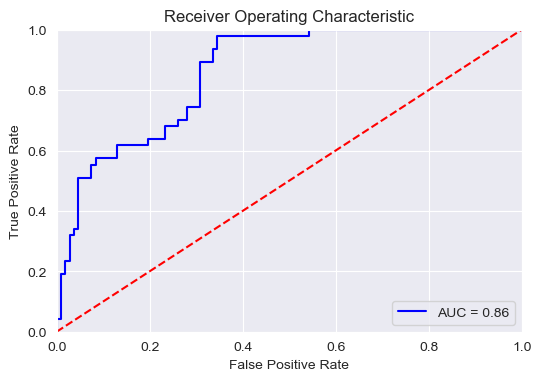

In [68]:
probs = grid_svc.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## We can see SVC is doing better than KNN and Decision Tree. Let us combine these models and see if we can improve accuracy.

# Voting Classifier

In [79]:
from sklearn.ensemble import VotingClassifier

classifiers = [('knn',grid_knn),('dtc',grid_dtc),('svc',grid_svc)]

vtc = VotingClassifier(classifiers)

In [80]:
vtc.fit(x_train_std,y_train)
print("Accuracy on Test set ==> ", vtc.score(x_test_std,y_test))

Accuracy on Test set ==>  0.7857142857142857


## SVC is doing good till now. Let us see if Random Forest, XGBoost and ANN can help to achieve more accuracy.

# Feature Selection

In [71]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

for i in range(2,7):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(x_train_std,y_train)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(y_test, rfe.predict(x_test_std)))

Accuracy with Feature 2 ==> 0.7532467532467533
Accuracy with Feature 3 ==> 0.7857142857142857
Accuracy with Feature 4 ==> 0.7597402597402597
Accuracy with Feature 5 ==> 0.7727272727272727
Accuracy with Feature 6 ==> 0.8181818181818182


In [72]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=5, verbose=0)
rfe.fit(x_train_std,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

## Sometime keeping unwanted variable increase variance in model. Let us see if we can improve accuracy by removing them.

In [73]:
print("Important Features are ==> ",list(df.columns[:7][rfe.support_]))

Important Features are ==>  ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']


In [74]:
x=df.loc[:,list(df.columns[:7][rfe.support_])].values
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

(614, 5)
(154, 5)
(614,)
(154,)


# Random Forest Classifier

In [75]:
## Random Forest

Model = RandomForestClassifier(n_estimators=100, max_features=3)
Model.fit(x_train, y_train)
y_pred = Model.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.86      0.90      0.88       107
        True       0.74      0.68      0.71        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154

[[96 11]
 [15 32]]
accuracy is 0.8311688311688312


# XGBOOST

In [76]:
## XGBoost

Model=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

[11:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.86      0.83      0.85       107
        True       0.65      0.70      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.79       154

[[89 14]
 [18 33]]
accuracy is  0.7922077922077922


# ANN

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(x_train_std, y_train, batch_size = 10, epochs = 100)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
614/614 [==============================] - 1s 1ms/step - loss: 0.6895 - acc: 0.6336
Epoch 2/100
614/614 [==============================] - 0s 95us/step - loss: 0.6749 - acc: 0.6401
Epoch 3/100
614/614 [==============================] - 0s 91us/step - loss: 0.6375 - acc: 0.6401
Epoch 4/100
614/614 [==============================] - 0s 89us/step - loss: 0.5801 - acc: 0.7182
Epoch 5/100
614/614 [==============================] - 0s 90us/step - loss: 0.5326 - acc: 0.7508
Epoch 6/100
614/614 [==============================] - 0s 91us/step - loss: 0.5077 - acc: 0.7573
Epoch 7/100
614/614 [==============================] - 0s 101us/step - loss: 0.4948 - acc: 0.7524
Epoch 8/100
614/614 [==============================] - 0s 90us/step - loss: 0.4873 - acc: 0.7557
Epoch 9/100
614/614 [==============================] - 0s 94us/step - loss: 0.4837 - acc: 0.7541
Epoch 1

Epoch 79/100
614/614 [==============================] - 0s 93us/step - loss: 0.4636 - acc: 0.7720
Epoch 80/100
614/614 [==============================] - 0s 83us/step - loss: 0.4628 - acc: 0.7736
Epoch 81/100
614/614 [==============================] - 0s 80us/step - loss: 0.4630 - acc: 0.7704
Epoch 82/100
614/614 [==============================] - 0s 88us/step - loss: 0.4629 - acc: 0.7704
Epoch 83/100
614/614 [==============================] - 0s 86us/step - loss: 0.4624 - acc: 0.7736
Epoch 84/100
614/614 [==============================] - 0s 91us/step - loss: 0.4626 - acc: 0.7736
Epoch 85/100
614/614 [==============================] - 0s 84us/step - loss: 0.4627 - acc: 0.7704
Epoch 86/100
614/614 [==============================] - 0s 86us/step - loss: 0.4625 - acc: 0.7687
Epoch 87/100
614/614 [==============================] - 0s 91us/step - loss: 0.4626 - acc: 0.7752
Epoch 88/100
614/614 [==============================] - 0s 89us/step - loss: 0.4625 - acc: 0.7671
Epoch 89/100
614/614

In [82]:
y_pred_test = classifier.predict(x_test_std)
y_pred_test=y_pred_test>0.5

y_pred_train = classifier.predict(x_train_std)
y_pred_train=y_pred_train>0.5

print("Accuracy on Train Set ==> ",metrics.accuracy_score(y_train,y_pred_train))
print("Accuracy on Test Set ==> ",metrics.accuracy_score(y_test,y_pred_test))

Accuracy on Train Set ==>  0.7671009771986971
Accuracy on Test Set ==>  0.7597402597402597


# Among all SVC, Random Forest and XGBoost Classifiers are doing well.